## DAND Project 2: Investigate a Dataset
For this DAND Project, I am going to investigate the **Titanic Data**

The dataset is from [Kaggle](https://www.kaggle.com/c/titanic/data)

With data analysis, I hope to answer if passengers are more likely to survive due to:
1. Age
2. Gender
3. P - Class


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the table we can tell:
1. 177 passengers' age is not included in the dataset, which we will have to take care of in the investigation
2. Average age of passengers is 29.699
3. On average, passengers paid 32.2 for fare, and the min fare price is zero, probably crew members or invited celebrities
4. Someone paid 512.329 for the fare, I hope he/she survived

In [2]:
titanic_df.loc[titanic_df['Fare'] > 512]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Looks like three people paid 512.3292 for the fare and they all survived. Without furhter ado, I will start looking at survivorship by age.

## First factor: Age 

In [3]:
len(titanic_df.loc[titanic_df['Survived'] == 1]) / len(titanic_df.loc[titanic_df['Survived']])

0.3838383838383838

Firstly, the overall survival rate is 38.38%

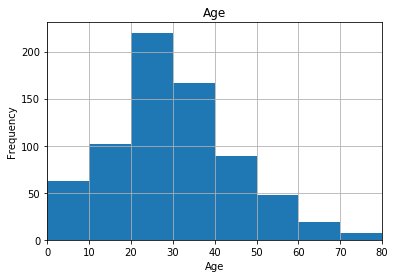

In [4]:
titanic_df.hist(column="Age", bins=range(0,90,10))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim([0,80])
plt.show()

Then I plotted a histogram to take a look at the age distribution.

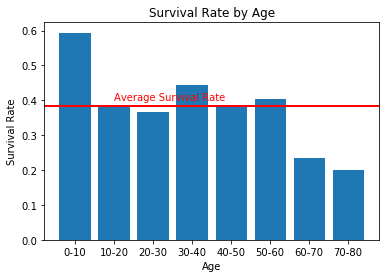

In [51]:
binned_by_age = []
survival_by_age = []

for i in range (0,8):
    binned_by_age.append(titanic_df.loc[(titanic_df['Age'] <= (i + 1) * 10) & (titanic_df['Age'] > i * 10)])
for j in range (0,8):
    if len(binned_by_age[j]) != 0:
        survival_by_age.append(len(binned_by_age[j].loc[titanic_df['Survived'] == 1])/len(binned_by_age[j]))
    else: survival_by_age.append(0)

objects = ['0-10', '10-20','20-30', '30-40','40-50','50-60','60-70', '70-80']
y_pos = np.arange(len(objects))
plt.bar(y_pos, survival_by_age)
plt.xticks(y_pos, objects)
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age')
plt.axhline(y=.383838, xmin=0, xmax=80, linewidth=2, color = 'r')
plt.text(1,0.4,'Average Survival Rate', color = 'r')
plt.show()

Younger passengers (age 0-10) are more likely to survive, while older passengers (age 60-70) are less likely to survive. Survival rate for other age groups are roughly the same.

## Second Factor: Gender

In [6]:
###Group passengers by survivorship and gender for furthur analysis

survived = titanic_df.loc[titanic_df['Survived'] == 1]
survived_count = len(survived['Name'])

survived_male = survived.loc[survived['Sex'] == 'male']
survived_male_count = len(survived_male['Name'])

survived_female = survived.loc[survived['Sex'] == 'female']
survived_female_count = len(survived_female['Name'])

perished = titanic_df.loc[titanic_df['Survived'] == 0]
perished_count = len(perished['Name'])

perished_male = perished.loc[perished['Sex'] == 'male']
perished_male_count = len(perished_male['Name'])

perished_female = perished.loc[perished['Sex'] == 'female']
perished_female_count = len(perished_female['Name'])


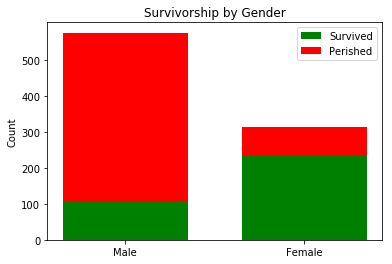

In [7]:
ind = np.arange(2)
width = 0.7

p1 = plt.bar(ind, (survived_male_count, survived_female_count), width, color='g')
p2 = plt.bar(ind, (perished_male_count, perished_female_count), 
             width, bottom=(survived_male_count, survived_female_count), color='r')

plt.ylabel('Count')
plt.title('Survivorship by Gender')
plt.xticks(ind, ('Male', 'Female'))
plt.yticks(np.arange(0, 600, 100))
plt.legend((p1[0], p2[0]), ('Survived', 'Perished'))

plt.show()

In [8]:
print ('Male survival rate is', '%.4f' %(survived_male_count / (survived_male_count + perished_male_count)))
print ('Female survival rate is', '%.4f' %(survived_female_count / (survived_female_count + perished_female_count)))


Male survival rate is 0.1889
Female survival rate is 0.7420


It is clearly shown that female passengers have a greater chance of survival than male passengers. Propably due to the "women and children first" code of conduct dating from 1852. 

## Third Factor: Passenger Class

In [9]:
###Group passengers by survivorship and Pclass for furthur analysis

p_class_3_survived = len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Survived'] == 1)])
p_class_3_perished = len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Survived'] == 0)])

p_class_2_survived = len(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Survived'] == 1)])
p_class_2_perished = len(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Survived'] == 0)])

p_class_1_survived = len(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Survived'] == 1)])
p_class_1_perished = len(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Survived'] == 0)])

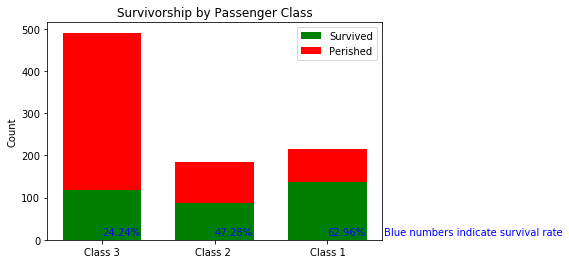

In [46]:
ind = np.arange(3)
width = 0.7

p1 = plt.bar(ind, (p_class_3_survived, p_class_2_survived, p_class_1_survived), width, color='g')
p2 = plt.bar(ind, (p_class_3_perished, p_class_2_perished, p_class_1_perished), 
             width, bottom=(p_class_3_survived, p_class_2_survived, p_class_1_survived), color='r')

plt.ylabel('Count')
plt.title('Survivorship by Passenger Class')
plt.xticks(ind, ('Class 3', 'Class 2 ', 'Class 1'))
plt.yticks(np.arange(0, 600, 100))
plt.legend((p1[0], p2[0]), ('Survived', 'Perished'))
plt.text(0,10,str(round(p_class_3_survived / len(titanic_df[titanic_df['Pclass'] == 3]) * 100, 2)) + '%', color = 'b')
plt.text(1,10,str(round(p_class_2_survived / len(titanic_df[titanic_df['Pclass'] == 2]) * 100, 2)) + '%', color = 'b')
plt.text(2,10,str(round(p_class_1_survived / len(titanic_df[titanic_df['Pclass'] == 1]) * 100, 2)) + '%', color = 'b')
plt.text(2.5,10, 'Blue numbers indicate survival rate', color = 'b')
plt.show()

Right away we can tell that class 1 passengers have a much greater chance of survival than class 2 or class 3 passengers. The survival rates are 24.24% for class 3, 47.28% for class 2, and 62.96% for class 3.

Now we have examined all three factors, I wonder, what would the survival rate be for a class 1 female aged 0-10?

In [49]:
luckiest_passenger = titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Age'] < 10) & (titanic_df['Pclass'] == 1)]
luckiest_passenger.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S


Poor little Helen.

## Conclusion and Thoughts

In this project I examined three factors: age, gender and passenger class, and they are all related to survivorship. Children aged 0 - 10, females, and class 1 passengers are more likely to survive than others. However, there are some limitations with my analysis.

First of all, the data contained 891 inputs while the ship had 2,224 passengers and crew on board. We have no idea how these 891 samples were chosen, or how many of them are actually crew members. I thought about using (fare == 0) to filter out crew members but these might be invited passengers too. It would be interesting to analyze crew members' survivorship and compare it against passengers'

The second flaw with the data is lack of age input for 177 samples, making the conclusion that children aged 0 - 10 are more likely to survive less sound.

An interesting addition to the project would be to analyze if passengers are more or less likely to survive when they have a significant other onboard. This question is inspired by the movie Titanic. But to answer this question, we would need a much more completed dataset, which might not even exist.